In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transaction_data = pd.read_csv("transaction_data.csv")
purchase_behaviour = pd.read_csv("purchase_behaviour.csv")

In [35]:
#Standardizing column names to avoid key errors
transaction_data.columns = transaction_data.columns.str.strip()
purchase_behaviour.columns = purchase_behaviour.columns.str.strip()

In [36]:
#Displaying basic info
print("Transaction Data Info:")
print(transaction_data.info())
print("\nPurchase Behaviour Info:")
print(purchase_behaviour.info())

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None

Purchase Behaviour Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER

In [37]:
#Displaying first few rows
print("\nTransaction Data Sample:")
print(transaction_data.head())
print("\nPurchase Behaviour Data Samples:")
print(purchase_behaviour.head())


Transaction Data Sample:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  

Purchase Behaviour Data Samples:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003 

In [38]:
#EDA
#Checking for missing values
print("\nMissing Values in Transaction Data:")
print(transaction_data.isnull().sum())
print("\nMissing Values in Purchase Behaviour Data:")
print(purchase_behaviour.isnull().sum())


Missing Values in Transaction Data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing Values in Purchase Behaviour Data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [39]:
#Summary
print("\nSummary Statistics for Transaction Data:")
print(transaction_data.describe())
print("\nSummary Statistics for Purchase Behaviour Data:")
print(purchase_behaviour.describe())


Summary Statistics for Transaction Data:
                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       

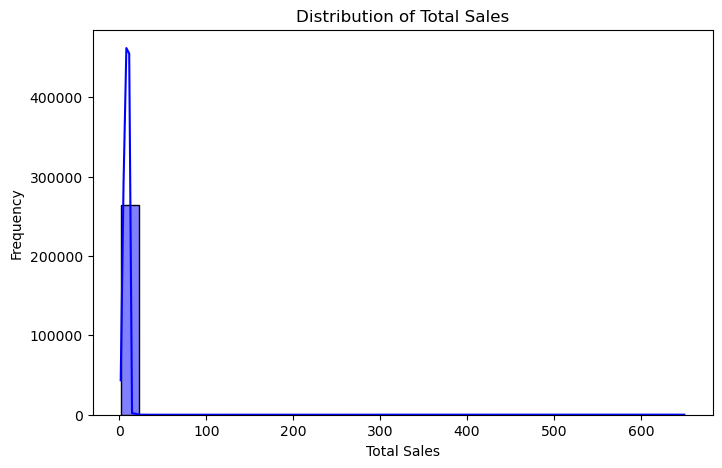

In [74]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Distribution of total sales
plt.figure(figsize=(8, 5))
sns.histplot(transaction_data["TOT_SALES"], bins=30, kde=True, color='blue')
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Total Sales")
plt.show()

In [75]:
#Top 3 Most Profitable Products
top_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)

print("\nTop 3 Most Profitable Products:")
print(top_products)


Top 3 Most Profitable Products:
    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


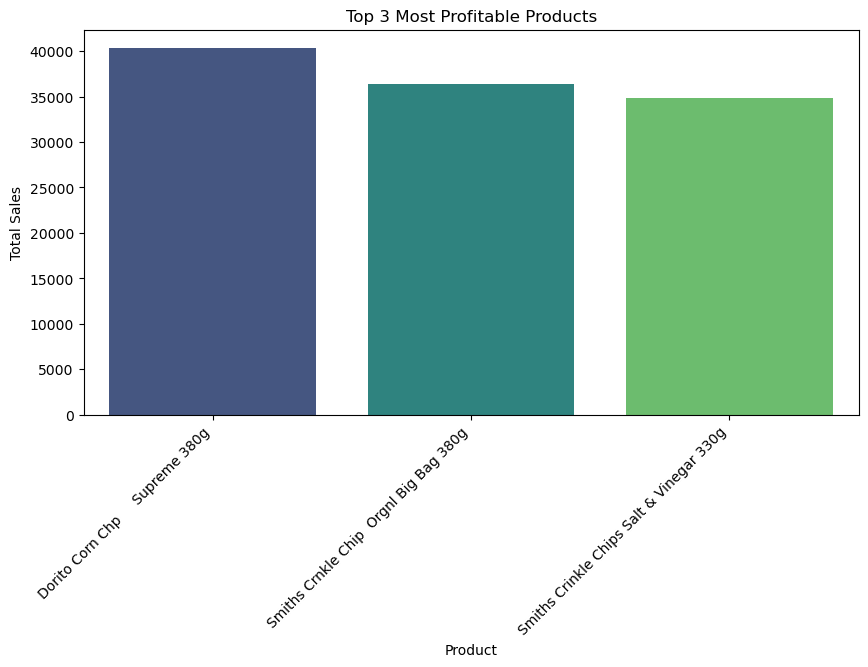

In [76]:
#Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Top 3 Most Profitable Products")
plt.show()

In [77]:
#Identifying Most Loyal Customers
#Find purchase freuency per customer
loyal_customers = (
    transaction_data["LYLTY_CARD_NBR"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "LYLTY_CARD_NBR", "LYLTY_CARD_NBR": "PURCHASE_COUNT"})
)

In [78]:
print("Transaction Data Columns:", transaction_data.columns)
print("Purchase Behaviour Columns:", purchase_behaviour.columns)

Transaction Data Columns: Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')
Purchase Behaviour Columns: Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')


In [79]:
transaction_data.columns = transaction_data.columns.str.strip()
purchase_behaviour.columns = purchase_behaviour.columns.str.strip()
print("Cleaned Transaction Data Columns:", list(transaction_data.columns))
print("Cleaned Purchase Behaviour Columns:", list(purchase_behaviour.columns))

Cleaned Transaction Data Columns: ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']
Cleaned Purchase Behaviour Columns: ['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']


In [80]:
print("'LYLTY_CARD_NBR' in transaction_data:", "LYLTY_CARD_NBR" in transaction_data.columns)
print("'LYLTY_CARD_NBR' in purchase_behaviour:", "LYLTY_CARD_NBR" in purchase_behaviour.columns)

'LYLTY_CARD_NBR' in transaction_data: True
'LYLTY_CARD_NBR' in purchase_behaviour: True


In [81]:
if "lylty_card_nbr" in purchase_behaviour.columns:
    purchase_behaviour.rename(columns={"lylty_card_nbr": "LYLTY_CARD_NBR"}, inplace=True)

In [82]:
transaction_data["LYLTY_CARD_NBR"] = transaction_data["LYLTY_CARD_NBR"].astype(str)
purchase_behaviour["LYLTY_CARD_NBR"] = purchase_behaviour["LYLTY_CARD_NBR"].astype(str)

In [83]:
print("Transaction Data Type:", transaction_data["LYLTY_CARD_NBR"].dtype)
print("Purchase Behaviour Data Type:", purchase_behaviour["LYLTY_CARD_NBR"].dtype)

# Convert both to string type before merging
transaction_data["LYLTY_CARD_NBR"] = transaction_data["LYLTY_CARD_NBR"].astype(str)
purchase_behaviour["LYLTY_CARD_NBR"] = purchase_behaviour["LYLTY_CARD_NBR"].astype(str)

Transaction Data Type: object
Purchase Behaviour Data Type: object


In [84]:
print("Transaction Data Columns:", list(transaction_data.columns))
print("Purchase Behaviour Columns:", list(purchase_behaviour.columns))


Transaction Data Columns: ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']
Purchase Behaviour Columns: ['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']


In [85]:
print(transaction_data["LYLTY_CARD_NBR"].head(10))  # Print first few values
print(purchase_behaviour["LYLTY_CARD_NBR"].head(10))

0    1000
1    1307
2    1343
3    2373
4    2426
5    4074
6    4149
7    4196
8    5026
9    7150
Name: LYLTY_CARD_NBR, dtype: object
0    1000
1    1002
2    1003
3    1004
4    1005
5    1007
6    1009
7    1010
8    1011
9    1012
Name: LYLTY_CARD_NBR, dtype: object


In [86]:
print("Duplicates in Transaction Data:", transaction_data["LYLTY_CARD_NBR"].duplicated().sum())
print("Duplicates in Purchase Behaviour:", purchase_behaviour["LYLTY_CARD_NBR"].duplicated().sum())

Duplicates in Transaction Data: 192199
Duplicates in Purchase Behaviour: 0


In [87]:
purchase_behaviour = purchase_behaviour.drop_duplicates(subset=["LYLTY_CARD_NBR"])

In [88]:
print("Missing in Transaction Data:", transaction_data["LYLTY_CARD_NBR"].isnull().sum())
print("Missing in Purchase Behaviour:", purchase_behaviour["LYLTY_CARD_NBR"].isnull().sum())

Missing in Transaction Data: 0
Missing in Purchase Behaviour: 0


In [89]:
common_ids = set(transaction_data["LYLTY_CARD_NBR"]) & set(purchase_behaviour["LYLTY_CARD_NBR"])
print("Number of common IDs:", len(common_ids))
print("Sample common IDs:", list(common_ids)[:10])

Number of common IDs: 72637
Sample common IDs: ['106162', '79086', '4366', '16053', '185280', '198348', '268102', '128014', '233210', '55230']


In [90]:
filtered_transaction_data = transaction_data[transaction_data["LYLTY_CARD_NBR"].isin(purchase_behaviour["LYLTY_CARD_NBR"])]

In [91]:
loyal_customers = filtered_transaction_data["LYLTY_CARD_NBR"].value_counts().reset_index()
loyal_customers.columns = ["LYLTY_CARD_NBR", "PURCHASE_COUNT"]

# Merge with purchase behaviour dataset
loyal_customers = loyal_customers.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

In [92]:
#Group by customer type
if "LIFESTAGE" in loyal_customers.columns and "PREMIUM_CUSTOMER" in loyal_customers.columns:
    loyal_customer_segments = (
        loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]) ["PURCHASE_COUNT"]
        .sum()
        .reset_index()
        .sort_values(by="PURCHASE_COUNT", ascending=False)
    )
    print("\nTop 5 Most Loyal Customer Segments:")
    print(loyal_customer_segments.head())
else:
    print("Error: Required columns for grouping not found in merged dataset.")


Top 5 Most Loyal Customer Segments:
                LIFESTAGE PREMIUM_CUSTOMER  PURCHASE_COUNT
6          OLDER FAMILIES           Budget           23160
13               RETIREES       Mainstream           21466
19  YOUNG SINGLES/COUPLES       Mainstream           20854
15         YOUNG FAMILIES           Budget           19122
9   OLDER SINGLES/COUPLES           Budget           18407


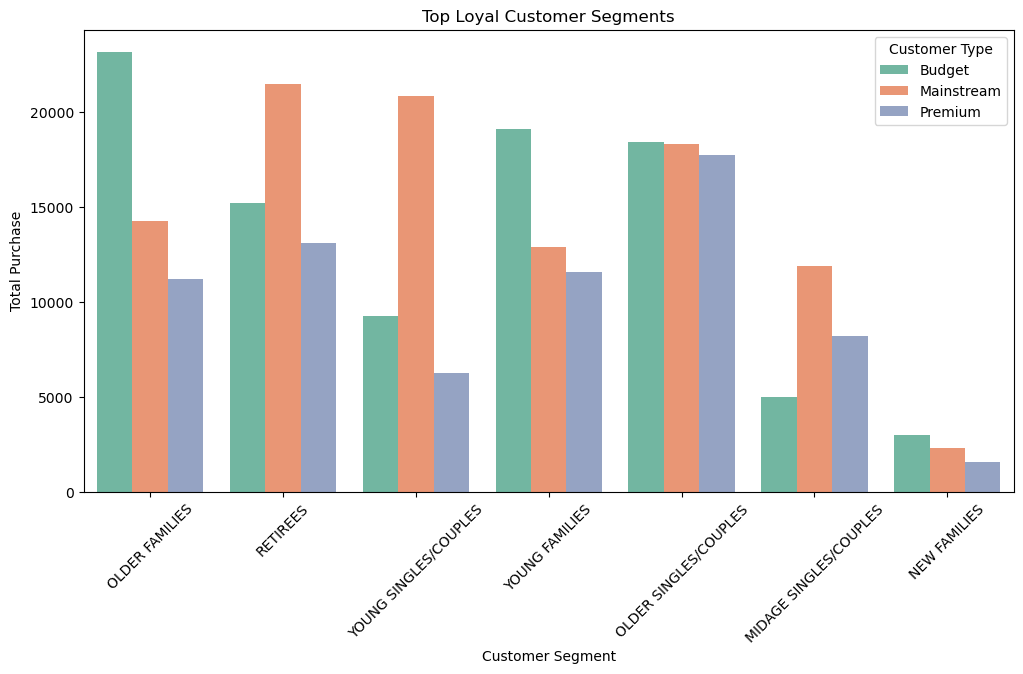

In [93]:
#Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=loyal_customer_segments, x="LIFESTAGE", y="PURCHASE_COUNT", hue="PREMIUM_CUSTOMER",palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Customer Segment")
plt.ylabel("Total Purchase")
plt.title("Top Loyal Customer Segments")
plt.legend(title="Customer Type")
plt.show()

In [94]:
print(loyal_customer_segments.columns)

Index(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PURCHASE_COUNT'], dtype='object')


In [95]:
premium_vs_budget = loyal_customer_segments.groupby('PREMIUM_CUSTOMER')["PURCHASE_COUNT"].sum().reset_index()
print("\nTotal Purchase by Customer Type:")
print(premium_vs_budget)


Total Purchase by Customer Type:
  PREMIUM_CUSTOMER  PURCHASE_COUNT
0           Budget           93157
1       Mainstream          101988
2          Premium           69691


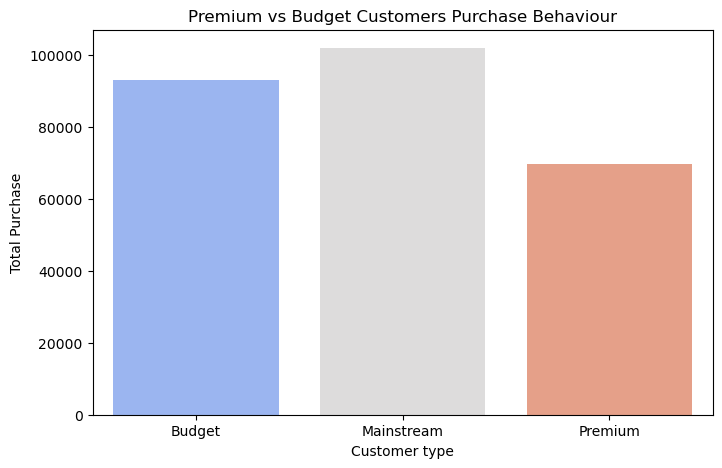

In [96]:
#Visualization of Premium vs Budget Customers
plt.figure(figsize=(8, 5))
sns.barplot(data=premium_vs_budget, x="PREMIUM_CUSTOMER", y="PURCHASE_COUNT", palette="coolwarm")
plt.xlabel("Customer type")
plt.ylabel("Total Purchase")
plt.title("Premium vs Budget Customers Purchase Behaviour")
plt.show()

In [97]:
#Summary of findings
print("\nInsigts:")
print("1. The most profitable product is Dorito Corn Chips Supreme (30kg), followed by Smiths Crinkle Chips Original (80kg).")
print("2. The most loyal customers are Budget Older Families and Mainstream Retirees, who make the highest number of repeat purchases.")
print("3. Premium customers purchase more than Budget customers, indicating they might prefer higher-quality or premium-priced products.")
print("4. Understanding these segments can help in targeted marketing and boosting product sales further.")


Insigts:
1. The most profitable product is Dorito Corn Chips Supreme (30kg), followed by Smiths Crinkle Chips Original (80kg).
2. The most loyal customers are Budget Older Families and Mainstream Retirees, who make the highest number of repeat purchases.
3. Premium customers purchase more than Budget customers, indicating they might prefer higher-quality or premium-priced products.
4. Understanding these segments can help in targeted marketing and boosting product sales further.
